In [379]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

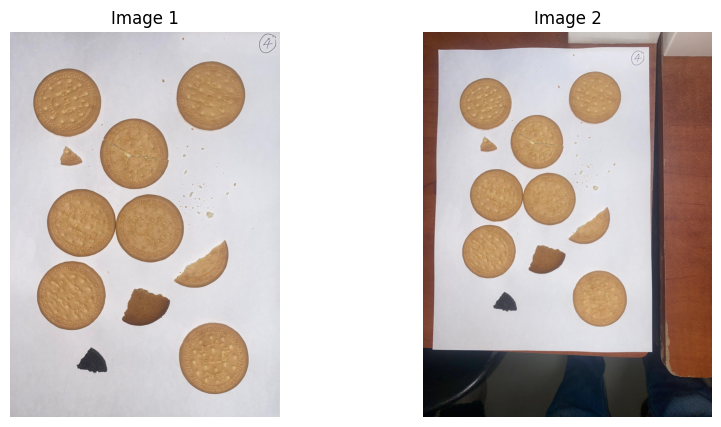

In [380]:
img1_Color = cv2.imread('B1.jpg', cv2.IMREAD_COLOR_RGB)
img1 = cv2.imread('B1.jpg', cv2.IMREAD_GRAYSCALE)
img2_Color = cv2.imread('B2.jpg', cv2.IMREAD_COLOR_RGB)
img2 = cv2.imread('B2.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Image 1")
plt.imshow(img1_Color)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Image 2")
plt.imshow(img2_Color)
plt.axis('off')

Since the first image have a clear background Image 1 will be selected.

C:\Users\kokum\AppData\Local\Temp\ipykernel_5568\1899148055.py:15: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img1.ravel(), 256, [0, 256], color='gray')
C:\Users\kokum\AppData\Local\Temp\ipykernel_5568\1899148055.py:22: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(equalized1.ravel(), 256, [0, 256], color='gray')


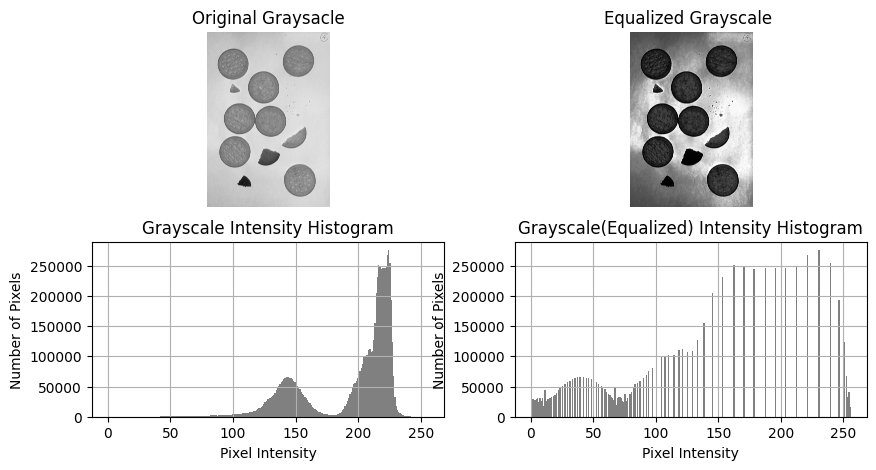

In [381]:
equalized1 = cv2.equalizeHist(img1)

plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.title("Original Graysacle")
plt.imshow(img1, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Equalized Grayscale ")
plt.imshow(equalized1, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.hist(img1.ravel(), 256, [0, 256], color='gray')
plt.title('Grayscale Intensity Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.hist(equalized1.ravel(), 256, [0, 256], color='gray')
plt.title('Grayscale(Equalized) Intensity Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.grid(True)

Since the equalizing have  weakened the contrast between types/burned biscuits, Will be moving on with the original image.

# Segmentation

### Piecewise segmentation

(np.float64(-0.5), np.float64(2293.5), np.float64(3276.5), np.float64(-0.5))

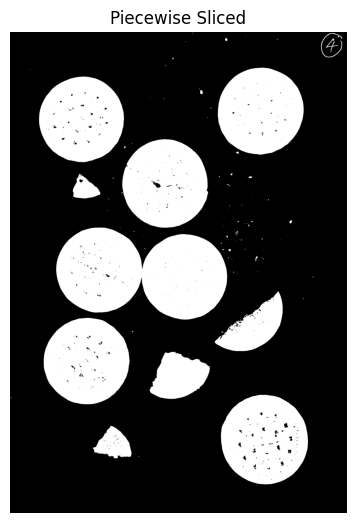

In [382]:
img = cv2.imread('B1.jpg')

# Defining intensity range to identify every buiscuits and pieces
A1 = 40
B1 = 175
highlight_value = 255

# piecewise intensity level slicing
sliced1 = np.where((img1 >= A1) & (img1 <= B1), highlight_value, 0).astype(np.uint8)

plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 1)
plt.title("Piecewise Sliced")
plt.imshow(sliced1, cmap='gray')
plt.axis('off')


### Removing Particle

(np.float64(-0.5), np.float64(2293.5), np.float64(3276.5), np.float64(-0.5))

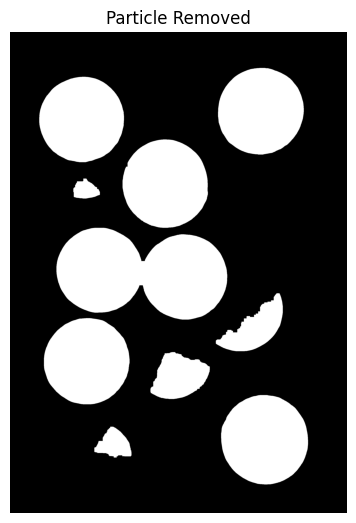

In [383]:
def remove_particles(binary_image):

    open_kernel_size=(20, 20)
    close_kernel_size=(23, 23)
    # Define structuring elements (kernels)
    kernel_open = np.ones(open_kernel_size, np.uint8)
    kernel_close = np.ones(close_kernel_size, np.uint8)

    # Apply opening to remove small white noise
    opened = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel_open)

    # Apply closing to fill small black holes inside white areas
    cleaned_image = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel_close)

    return cleaned_image

clean_slice = remove_particles(sliced1)

plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 1)
plt.title("Particle Removed")
plt.imshow(clean_slice, cmap='gray')
plt.axis('off')

### Applying Boundry

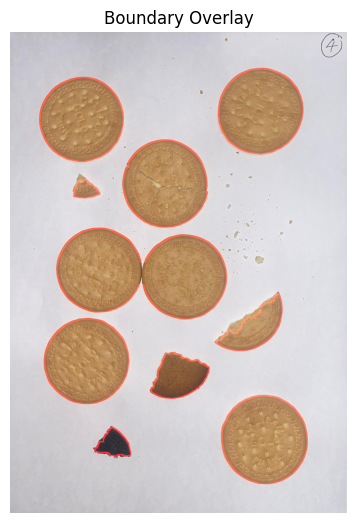

In [384]:
def highlight_morphological_boundary(original_img):
    # If original is grayscale, convert to BGR for color overlay
    if len(original_img.shape) == 2:
        image_color = cv2.cvtColor(original_img, cv2.COLOR_GRAY2BGR)
    else:
        image_color = original_img.copy()

    # Convert to grayscale and threshold if needed
    gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY) if len(image_color.shape) == 3 else image_color
    binary = np.where((gray >= A1) & (img1 <= B1), highlight_value, 0).astype(np.uint8)

    clean_sliced = remove_particles(binary)

    kernel_size=(20, 20)
    kernel_1 = np.ones(kernel_size, np.uint8)
    eroded = cv2.erode(clean_sliced, kernel_1)

    # Get boundary by subtracting eroded from closed
    edge = cv2.subtract(clean_sliced, eroded)

    # Create color boundary mask (e.g., red)
    boundary_mask = np.zeros_like(image_color)
    boundary_mask[edge > 0] = [0, 0, 255]  # Red color

    # Overlay red boundary on original image
    boundary_overlay = cv2.addWeighted(image_color, 1, boundary_mask, 1, 0)

    return boundary_overlay


result = highlight_morphological_boundary(img)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 1)
plt.imshow(result_rgb)
plt.title("Boundary Overlay")
plt.axis('off')
plt.show()

Piecewise pixel intencity was used to threshold the image to get a better boundry with segmentation. Diluting and iroding the picture will remove the biscuits small particles.

### Identifying Burned Pieces

(np.float64(-0.5), np.float64(2293.5), np.float64(3276.5), np.float64(-0.5))

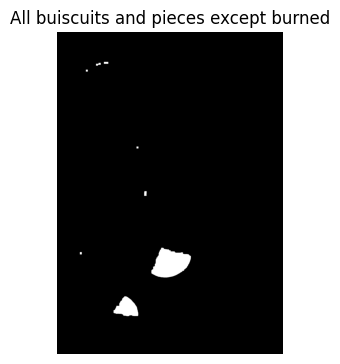

In [ ]:
#defining intensity values to identify not burned buiscuits
A2 = 125
B2 = 175

sliced2 = np.where((img1 >= A2) & (img1 <= B2), highlight_value, 0).astype(np.uint8)

Burned = cv2.bitwise_xor(sliced1, sliced2)
Burned = remove_particles(Burned)

plt.subplot(1, 2, 1)
plt.title("All buiscuits and pieces except burned")
plt.imshow(Burned, cmap='gray')
plt.axis('off')


slicing to higher scale was used to remove burned biscuits and keep only not burned biscuits, then XOR function was used with ealier sliced image to only sort out burned buiscuit/discolored biscuits.

### Annotating Burned Pieces

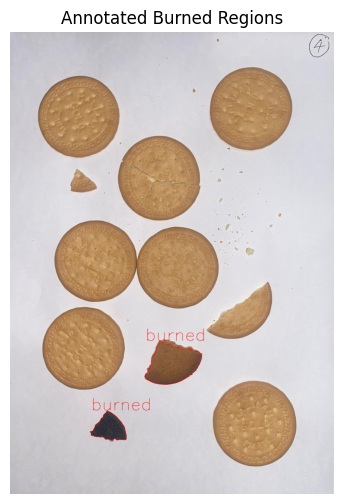

In [386]:
contours, _ = cv2.findContours(Burned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


for cnt in contours:
    area = cv2.contourArea(cnt)
    if area >= 5000:
        # Get bounding box
        x, y, w, h = cv2.boundingRect(cnt)

            # Draw contour (optional)
        cv2.drawContours(img1_Color, [cnt], -1, (255, 0, 0), 2)

            # Put label
        cv2.putText(img1_Color, 'burned', (x, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 4, (255, 0, 0), 2)

plt.figure(figsize=(6, 6))
plt.imshow(img1_Color)
plt.title("Annotated Burned Regions")
plt.axis('off')
plt.show()

### Identifying Partial, Intact and Cracked Biscuits

(np.float64(-0.5), np.float64(2293.5), np.float64(3276.5), np.float64(-0.5))

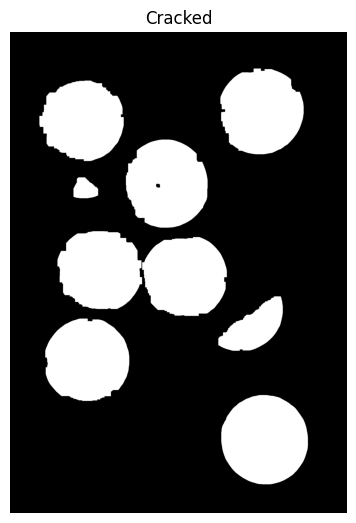

In [387]:
A3 = 130
B3 = 175
sliced3 = np.where((img1 >= A3) & (img1 <= B3), highlight_value, 0).astype(np.uint8)

close_kernel_size=(18, 18)
open_kernel_size =(45, 45)
kernel_close = np.ones(close_kernel_size, np.uint8)
kernel_open = np.ones(open_kernel_size, np.uint8)
cleaned_image = cv2.morphologyEx(sliced3, cv2.MORPH_CLOSE, kernel_close)
cleaned_image2 = cv2.morphologyEx(cleaned_image, cv2.MORPH_OPEN, kernel_open)


plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 1)
plt.title("Cracked")
plt.imshow(cleaned_image2, cmap='gray')
plt.axis('off')

### Annotating Partial, Cracked and Intact Biscuits

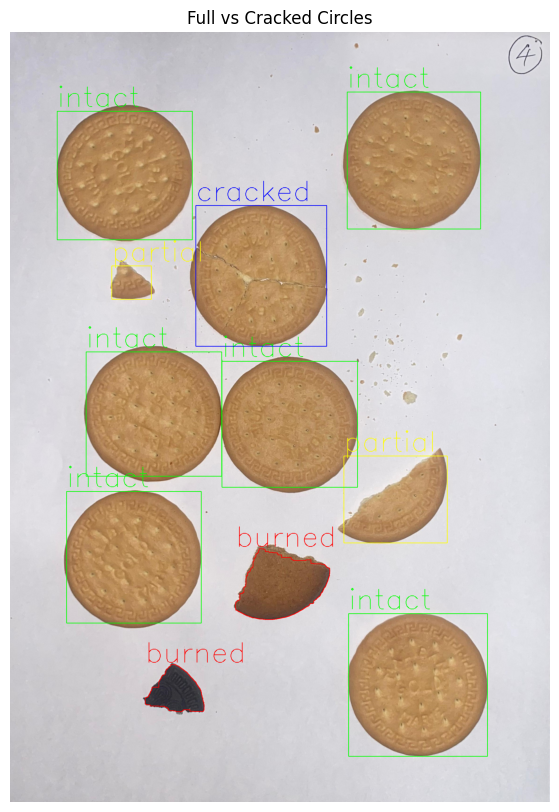

In [388]:
contours, _ = cv2.findContours(cleaned_image2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for i, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)

        if area < 100 or perimeter == 0:
            continue

        # Circularity test
        circularity = 4 * np.pi * area / (perimeter ** 2)

         # Bounding circle radius
        (_, _), radius = cv2.minEnclosingCircle(contour)

        # Circularity test
        circularity = 4 * np.pi * area / (perimeter ** 2)

        if circularity < 0.65 or radius < 200:
            # Not a full circle (e.g., semicircle or irregular blob)
            label = "partial"
            color = (255, 255, 0)
        else:
            # It's a full circle — now check for cracks
            mask = np.zeros_like(cleaned_image2)
            cv2.drawContours(mask, [contour], -1, 255, -1)

            # Invert to get black cracks as white
            inverted = cv2.bitwise_not(cleaned_image2)
            region_of_interest = cv2.bitwise_and(inverted, inverted, mask=mask)

            # Count inner contours (cracks)
            crack_contours, _ = cv2.findContours(region_of_interest, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            total_crack_area = sum(cv2.contourArea(cnt) for cnt in crack_contours)

            if total_crack_area > 50:
                label = "cracked"
                color = (0, 0, 255)
            else:
                label = "intact"
                color = (0, 255, 0)

        # Annotate
        x, y, w, h = cv2.boundingRect(contour)
        cv2.putText(img1_Color, label, (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 4, color, 2)
        cv2.rectangle(img1_Color, (x, y), (x + w, y + h), color, 2)

plt.figure(figsize=(8, 10))
plt.imshow(img1_Color)
plt.title("Full vs Cracked Circles")
plt.axis('off')
plt.show()